In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import datetime
import yfinance as yf
import pyodbc
import FinanceLib as fl
import time
import os
import sys
from datetime import timedelta, date
import bs4 as bs
import pickle
import requests

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
import FinanceLib as fl

In [11]:
# con = pyodbc.connect(driver = '{SQL Server}',server = '77.221.144.170', port = '1433', database = 'Finance', UID = 'SA', PWD = 'Sauth1900$', autocommit=True)
config_dict = fl.ReadConnConfig(fname)
con = pyodbc.connect(driver = config_dict['DRIVER'],server = config_dict['SERVER'], port = config_dict['PORT'], database = config_dict['DATABASE'], UID = config_dict['UID'], PWD = config_dict['PWD'], autocommit=True)


https://www.quandl.com/

https://medium.com/swlh/simple-quick-and-accurate-macroeconomic-analysis-with-python-cca3fe1206a2

https://briandew.wordpress.com/python/

https://library.law.yale.edu/news/75-sources-economic-data-statistics-reports-and-commentary


In [4]:
pip install quandl

Note: you may need to restart the kernel to use updated packages.


In [2]:
import quandl

In [4]:
quandl.ApiConfig.api_key = 'gXuJAxwrCMhG5aWiM4-P'

In [ ]:
import os
os.environ['HTTP_PROXY']="10.0.63.134:3128"

In [20]:
# Pull WTI Crude Oil data from quandl
oil = pd.DataFrame(quandl.get("FRED/DCOILWTICO", start_date="2015-12-31", end_date="2020-09-18", collapse="daily"))
print(oil)
# Output DataFrame to CSV file
oil.to_csv("oil.csv", index=True)

            Value
Date             
2015-12-31  37.13
2016-01-04  36.81
2016-01-05  35.97
2016-01-06  33.97
2016-01-07  33.29
...           ...
2020-09-08  36.87
2020-09-09  38.05
2020-09-10  37.25
2020-09-11  37.33
2020-09-14  37.23

[1179 rows x 1 columns]


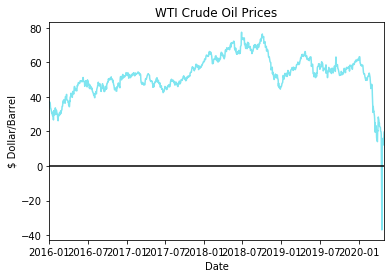

<Figure size 720x1080 with 0 Axes>

In [21]:
# Plot initial data, with specific color
plt.plot(oil, color='#7FE5F0')
# Label and title adjustments
plt.xlabel('Date')
plt.ylabel('$ Dollar/Barrel')
plt.title('WTI Crude Oil Prices')
plt.axhline(0, color='black')
plt.xlim(datetime.date(2015, 12, 31),datetime.date(2020, 4, 30))
# Resizing and Saving Figure
fig = plt.gcf()
fig = figure(num=None, figsize=(10,15))
fig.savefig('WTICrude.png', dpi=100)

In [22]:
# Pull unemployment data
unemployment = pd.DataFrame(quandl.get("FRED/UNRATE", start_date="2000-12-31", end_date="2020-04-20"))
print(unemployment)
# Push DataFrame to CSV
unemployment.to_csv("unemployment.csv", index=True)

            Value
Date             
2001-01-01    4.2
2001-02-01    4.2
2001-03-01    4.3
2001-04-01    4.4
2001-05-01    4.3
...           ...
2019-12-01    3.5
2020-01-01    3.6
2020-02-01    3.5
2020-03-01    4.4
2020-04-01   14.7

[232 rows x 1 columns]


In [8]:
pip install yfinance -U

  Created wheel for yfinance: filename=yfinance-0.1.54-py2.py3-none-any.whl size=22415 sha256=59962e6d09f1b02193f2cf52c6668c3a7627f86c0b916ba20caa3cd566540841
  Stored in directory: c:\users\40kravchukpv.region\appdata\local\pip\cache\wheels\28\79\3c\08a301b673366fe664fe2853e136eb2acc1bb752045c11c6a1
  Created wheel for multitasking: filename=multitasking-0.0.9-py3-none-any.whl size=8374 sha256=306b54420dfb98784e55fb352367f16edca69101327bc9aeeee23e055939c437
  Stored in directory: c:\users\40kravchukpv.region\appdata\local\pip\cache\wheels\ae\25\47\4d68431a7ec1b6c4b5233365934b74c1d4e665bf5f968d363a
Successfully built yfinance multitasking
Note: you may need to restart the kernel to use updated packages.


https://habr.com/ru/post/487644/

https://pypi.org/project/yfinance/


In [37]:
# Get the data for the stock AAPL
data = yf.download('AAPL','2017-01-01','2021-01-24')

[*********************100%***********************]  1 of 1 completed


In [38]:
df_to_lst = data.reset_index().values.tolist()

In [22]:
type(df_to_lst)

list

In [26]:
df_to_lst[0:2]

[[Timestamp('2018-12-31 00:00:00'),
  39.63249969482422,
  39.84000015258789,
  39.119998931884766,
  39.435001373291016,
  38.518611907958984,
  140014000],
 [Timestamp('2019-01-02 00:00:00'),
  38.72249984741211,
  39.712501525878906,
  38.557498931884766,
  39.47999954223633,
  38.56256103515625,
  148158800]]

In [39]:
for row in df_to_lst:
    Date = row[0]
    Stock = 'AAPL'
    Open = row[1]
    High = row[2]
    Low = row[3]
    Close = row[4]
    AdjClose = row[5]
    Volume = row[6]
    query = ("exec pLoadQuote '" + str(Date) + "', '" + str(Stock) + "' , " + str(Open) + ', ' + str(High) + ', ' + 
               str(Low) + ', ' + str(Close) + ', '  + str(AdjClose) + ', ' + str(Volume))
#     print(query)
    con.execute(query)
    con.commit()   

In [43]:
def SaveStockQuoteToDB(con, Stock, DateFrom, DateTo):
    data = yf.download(Stock, DateFrom, DateTo)
    df_to_lst = data.reset_index().values.tolist()
    try:
        for row in df_to_lst:
            Date = row[0]
            Stock = 'AAPL'
            Open = row[1]
            High = row[2]
            Low = row[3]
            Close = row[4]
            AdjClose = row[5]
            Volume = row[6]
            query = ("exec pLoadQuote '" + str(Date) + "', '" + str(Stock) + "' , " + str(Open) + ', ' + str(High) + ', ' + 
                       str(Low) + ', ' + str(Close) + ', '  + str(AdjClose) + ', ' + str(Volume))
            con.execute(query)
            con.commit()
        result = 0
    except:
        result = 1
    return result    

In [19]:
my_cursor = con.cursor()
query = "exec pGetQuote '2021-01-01', '2021-01-25', 'AAPL'"
my_cursor.execute(query)
result = my_cursor.fetchall()

In [17]:
type(result)

list

In [18]:
type(result[0])

pyodbc.Row

In [20]:
# df = pd.DataFrame(result) 
# data_transposed = zip(result)
# df = pd.DataFrame(data_transposed, columns=["Date", "Stock", "Open", "High", "Low", "Close", "AdjClose", "Volume"])
df = pd.read_sql(query, con)

In [16]:
type(data_transposed)

zip

In [38]:
df.head()

,Dt,Stock,OpenValue,HighValue,LowValue,CloseValue,AdjClose,Volume,LoadDt
0,2021-01-04,AAPL,133.520004,133.610001,126.760002,129.410004,129.410004,143301900.0,2021-01-25 20:57:42.850
1,2021-01-05,AAPL,128.889999,131.740005,128.429993,131.009995,131.009995,97664900.0,2021-01-25 20:57:42.863
2,2021-01-06,AAPL,127.720001,131.050003,126.379997,126.599998,126.599998,155088000.0,2021-01-25 20:57:42.880
3,2021-01-07,AAPL,128.360001,131.630005,127.860001,130.919998,130.919998,109578200.0,2021-01-25 20:57:42.893
4,2021-01-08,AAPL,132.429993,132.630005,130.229996,132.050003,132.050003,105158200.0,2021-01-25 20:57:42.907


In [31]:
def GetStockQuoteFromDB(con, Stock, DateFrom, DateTo):
    if Stock == 'NULL':
        StockStr = Stock
    else:
        StockStr = "'" + Stock + "'"
    query = "exec pGetQuote '" + DateFrom + "', '" + DateTo + "', " + StockStr
    print(query)
    df = pd.read_sql(query, con)
    return df


In [37]:
df = fl.GetStockQuoteFromDB(con, 'NULL', '2021-01-01', '2021-01-15')

exec pGetQuote '2021-01-01', '2021-01-15', NULL


In [44]:
SaveStockQuoteToDB(con, 'AAPL', '2021-01-01', '2021-01-24')

[*********************100%***********************]  1 of 1 completed


0

In [13]:
load_to_db = fl.SaveStockQuoteToDB(con, 'CLX', '2021-01-01', '2021-01-24')

Exception in thread Thread-23:
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\urllib3\connectionpool.py", line 662, in urlopen
    self._prepare_proxy(conn)
  File "C:\ProgramData\Anaconda3\lib\site-packages\urllib3\connectionpool.py", line 948, in _prepare_proxy
    conn.connect()
  File "C:\ProgramData\Anaconda3\lib\site-packages\urllib3\connection.py", line 308, in connect
    self._tunnel()
  File "C:\ProgramData\Anaconda3\lib\http\client.py", line 921, in _tunnel
    message.strip()))
OSError: Tunnel connection failed: 407 Proxy Authentication Required

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\requests\adapters.py", line 449, in send
    timeout=timeout
  File "C:\ProgramData\Anaconda3\lib\site-packages\urllib3\connectionpool.py", line 720, in urlopen
    method, url, error=e, _pool=self, _stacktrace=sys.exc_info()[2]
  File "C:\P

KeyboardInterrupt: 

In [47]:
load_to_db

0

In [5]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-12-31,39.632500,39.840000,39.119999,39.435001,38.518612,140014000
2019-01-02,38.722500,39.712502,38.557499,39.480000,38.562561,148158800
2019-01-03,35.994999,36.430000,35.500000,35.547501,34.721451,365248800
2019-01-04,36.132500,37.137501,35.950001,37.064999,36.203678,234428400
2019-01-07,37.174999,37.207500,36.474998,36.982498,36.123104,219111200


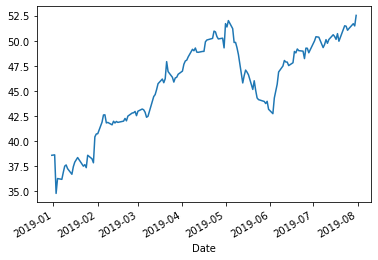

In [24]:
# Plot the close price of the AAPL
data['Adj Close'].plot()
plt.show()

In [25]:
# Define the ticker list
import pandas as pd
tickers_list = ['AAPL', 'WMT', 'IBM', 'MU', 'BA', 'AXP']

# Import pandas
data = pd.DataFrame(columns=tickers_list)

# Fetch the data

for ticker in tickers_list:
    data[ticker] = yf.download(ticker,'2016-01-01','2019-08-01')['Adj Close']

# Print first 5 rows of the data
data.head()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,AAPL,WMT,IBM,MU,BA,AXP
Date,,,,,,
2015-12-31,24.422157,54.597652,111.239960,14.16,128.679169,64.347275
2016-01-04,24.443037,54.740158,109.890060,14.33,125.039230,62.533890
2016-01-05,23.830513,56.040516,109.809242,14.82,125.546516,61.571701
2016-01-06,23.364161,56.601646,109.259583,14.22,123.553009,59.861889
2016-01-07,22.378082,57.919823,107.392403,13.66,118.373428,59.322926


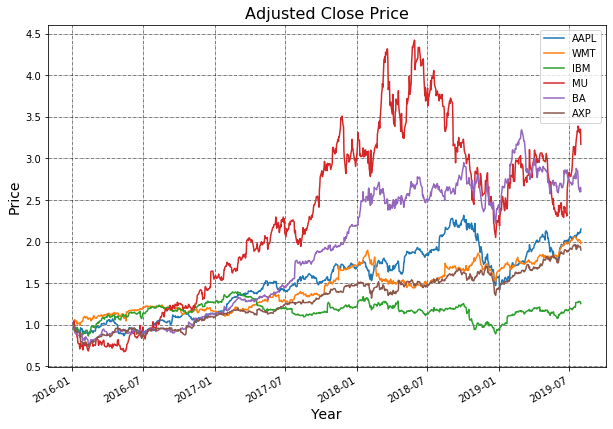

In [26]:
# Plot all the close prices
((data.pct_change()+1).cumprod()).plot(figsize=(10, 7))

# Show the legend
plt.legend()

# Define the label for the title of the figure
plt.title("Adjusted Close Price", fontsize=16)

# Define the labels for x-axis and y-axis
plt.ylabel('Price', fontsize=14)
plt.xlabel('Year', fontsize=14)

# Plot the grid lines
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()

In [27]:
tickers_list_rus = ['TTLK.ME', 'GMKN.ME', 'LSRG.ME', 'TATNP.ME', 'MSTT.ME', 'YNDX.ME']
data_rus = pd.DataFrame(columns = tickers_list_rus)
for ticker in tickers_list_rus:
    data_rus[ticker] = yf.download(ticker, '2019-01-01', '2019-12-31')['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
msft = yf.Ticker("MSFT")

# get stock info
msft.info

# get historical market data
hist = msft.history(period="max")

# show actions (dividends, splits)
msft.actions

# show dividends
msft.dividends

# show splits
msft.splits

# show financials
msft.financials
msft.quarterly_financials

# show major holders
stock.major_holders

# show institutional holders
stock.institutional_holders

# show balance heet
msft.balance_sheet
msft.quarterly_balance_sheet

# show cashflow
msft.cashflow
msft.quarterly_cashflow

# show earnings
msft.earnings
msft.quarterly_earnings

# show sustainability
msft.sustainability

# show analysts recommendations
msft.recommendations

# show next event (earnings, etc)
msft.calendar

# show ISIN code - *experimental*
# ISIN = International Securities Identification Number
msft.isin

# show options expirations
msft.options

# get option chain for specific expiration
opt = msft.option_chain('YYYY-MM-DD')
# data available via: opt.calls, opt.puts

In [28]:
msft = yf.Ticker("MSFT")

In [29]:
msft.info

{'zip': '98052-6399',
 'sector': 'Technology',
 'fullTimeEmployees': 163000,
 'longBusinessSummary': 'Microsoft Corporation develops, licenses, and supports software, services, devices, and solutions worldwide. Its Productivity and Business Processes segment offers Office, Exchange, SharePoint, Microsoft Teams, Office 365 Security and Compliance, and Skype for Business, as well as related Client Access Licenses (CAL); Skype, Outlook.com, and OneDrive; LinkedIn that includes Talent, Learning, Sales, and Marketing solutions, as well as premium subscriptions; and Dynamics 365, a set of cloud-based and on-premises business solutions for small and medium businesses, large organizations, and divisions of enterprises. Its Intelligent Cloud segment licenses SQL and Windows Servers, Visual Studio, System Center, and related CALs; GitHub that provides a collaboration platform and code hosting service for developers; and Azure, a cloud platform. It also offers support services and Microsoft consu

In [30]:
msft.recommendations

,Firm,To Grade,From Grade,Action
Date,,,,
2012-03-16 08:19:00,Argus Research,Buy,,up
2012-03-19 14:00:00,Hilliard Lyons,Long-Term Buy,,main
2012-03-22 07:03:00,Morgan Stanley,Overweight,,main
2012-04-03 11:53:00,UBS,Buy,,main
2012-04-20 06:18:00,Deutsche Bank,Buy,,main
...,...,...,...,...
2020-07-20 13:50:49,Jefferies,Buy,,main
2020-07-20 14:48:02,Raymond James,Strong Buy,,main
2020-07-23 08:43:04,Piper Sandler,Overweight,,main


In [36]:
msft.calendar

,0,1
Earnings Date,2020-10-21 00:00:00,2020-10-26 00:00:00
Earnings Average,1.54,1.54
Earnings Low,1.49,1.49
Earnings High,1.61,1.61
Revenue Average,35688400000,35688400000
Revenue Low,35299100000,35299100000
Revenue High,36394000000,36394000000


In [39]:
import bs4 as bs
import pickle
import requests

In [71]:
def save_sp500_tickers(con):
    resp = requests.get('http://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
    soup = bs.BeautifulSoup(resp.text, 'lxml')
    table = soup.find('table', {'class': 'wikitable sortable'})
    tickers = []
    for row in table.findAll('tr')[1:]:
#         ticker = row.findAll('td')[0].text
        ticker = []
        ticker.append(row.findAll('td')[0].text.replace('\n', ''))
        ticker.append(row.findAll('td')[1].text.replace("'", "''"))
        ticker.append(row.findAll('td')[3].text)
        ticker.append(row.findAll('td')[4].text)
        tickers.append(ticker)
        
    with open("sp500tickers.pickle","wb") as f:
        pickle.dump(tickers,f)
        
    for ticker in tickers:
        Stock = ticker[0]
        Security =  ticker[1]
        Sector = ticker[2]
        SubIndustry = ticker[3]

        query = ("exec pLoadStockList '" + str(Stock) + "', '" + str(Security) + "' , '" + str(Sector) +  "', '" + str(SubIndustry) + "'")
        print(query)
        con.execute(query)
        con.commit()
        
    return tickers

In [72]:
tickers = save_sp500_tickers(con)

exec pLoadStockList 'MMM', '3M Company' , 'Industrials', 'Industrial Conglomerates'
exec pLoadStockList 'ABT', 'Abbott Laboratories' , 'Health Care', 'Health Care Equipment'
exec pLoadStockList 'ABBV', 'AbbVie Inc.' , 'Health Care', 'Pharmaceuticals'
exec pLoadStockList 'ABMD', 'ABIOMED Inc' , 'Health Care', 'Health Care Equipment'
exec pLoadStockList 'ACN', 'Accenture plc' , 'Information Technology', 'IT Consulting & Other Services'
exec pLoadStockList 'ATVI', 'Activision Blizzard' , 'Communication Services', 'Interactive Home Entertainment'
exec pLoadStockList 'ADBE', 'Adobe Inc.' , 'Information Technology', 'Application Software'
exec pLoadStockList 'AMD', 'Advanced Micro Devices Inc' , 'Information Technology', 'Semiconductors'
exec pLoadStockList 'AAP', 'Advance Auto Parts' , 'Consumer Discretionary', 'Automotive Retail'
exec pLoadStockList 'AES', 'AES Corp' , 'Utilities', 'Independent Power Producers & Energy Traders'
exec pLoadStockList 'AFL', 'AFLAC Inc' , 'Financials', 'Life &

exec pLoadStockList 'CF', 'CF Industries Holdings Inc' , 'Materials', 'Fertilizers & Agricultural Chemicals'
exec pLoadStockList 'SCHW', 'Charles Schwab Corporation' , 'Financials', 'Investment Banking & Brokerage'
exec pLoadStockList 'CHTR', 'Charter Communications' , 'Communication Services', 'Cable & Satellite'
exec pLoadStockList 'CVX', 'Chevron Corp.' , 'Energy', 'Integrated Oil & Gas'
exec pLoadStockList 'CMG', 'Chipotle Mexican Grill' , 'Consumer Discretionary', 'Restaurants'
exec pLoadStockList 'CB', 'Chubb Limited' , 'Financials', 'Property & Casualty Insurance'
exec pLoadStockList 'CHD', 'Church & Dwight' , 'Consumer Staples', 'Household Products'
exec pLoadStockList 'CI', 'CIGNA Corp.' , 'Health Care', 'Managed Health Care'
exec pLoadStockList 'CINF', 'Cincinnati Financial' , 'Financials', 'Property & Casualty Insurance'
exec pLoadStockList 'CTAS', 'Cintas Corporation' , 'Industrials', 'Diversified Support Services'
exec pLoadStockList 'CSCO', 'Cisco Systems' , 'Information 

exec pLoadStockList 'FOXA', 'Fox Corporation (Class A)' , 'Communication Services', 'Movies & Entertainment'
exec pLoadStockList 'FOX', 'Fox Corporation (Class B)' , 'Communication Services', 'Movies & Entertainment'
exec pLoadStockList 'BEN', 'Franklin Resources' , 'Financials', 'Asset Management & Custody Banks'
exec pLoadStockList 'FCX', 'Freeport-McMoRan Inc.' , 'Materials', 'Copper'
exec pLoadStockList 'GPS', 'Gap Inc.' , 'Consumer Discretionary', 'Apparel Retail'
exec pLoadStockList 'GRMN', 'Garmin Ltd.' , 'Consumer Discretionary', 'Consumer Electronics'
exec pLoadStockList 'IT', 'Gartner Inc' , 'Information Technology', 'IT Consulting & Other Services'
exec pLoadStockList 'GD', 'General Dynamics' , 'Industrials', 'Aerospace & Defense'
exec pLoadStockList 'GE', 'General Electric' , 'Industrials', 'Industrial Conglomerates'
exec pLoadStockList 'GIS', 'General Mills' , 'Consumer Staples', 'Packaged Foods & Meats'
exec pLoadStockList 'GM', 'General Motors' , 'Consumer Discretionary'

exec pLoadStockList 'LMT', 'Lockheed Martin Corp.' , 'Industrials', 'Aerospace & Defense'
exec pLoadStockList 'L', 'Loews Corp.' , 'Financials', 'Multi-line Insurance'
exec pLoadStockList 'LOW', 'Lowe''s Cos.' , 'Consumer Discretionary', 'Home Improvement Retail'
exec pLoadStockList 'LUMN', 'Lumen Technologies' , 'Communication Services', 'Alternative Carriers'
exec pLoadStockList 'LYB', 'LyondellBasell' , 'Materials', 'Specialty Chemicals'
exec pLoadStockList 'MTB', 'M&T Bank Corp.' , 'Financials', 'Regional Banks'
exec pLoadStockList 'MRO', 'Marathon Oil Corp.' , 'Energy', 'Oil & Gas Exploration & Production'
exec pLoadStockList 'MPC', 'Marathon Petroleum' , 'Energy', 'Oil & Gas Refining & Marketing'
exec pLoadStockList 'MKTX', 'MarketAxess' , 'Financials', 'Financial Exchanges & Data'
exec pLoadStockList 'MAR', 'Marriott Int''l.' , 'Consumer Discretionary', 'Hotels, Resorts & Cruise Lines'
exec pLoadStockList 'MMC', 'Marsh & McLennan' , 'Financials', 'Insurance Brokers'
exec pLoadSt

exec pLoadStockList 'REGN', 'Regeneron Pharmaceuticals' , 'Health Care', 'Biotechnology'
exec pLoadStockList 'RF', 'Regions Financial Corp.' , 'Financials', 'Regional Banks'
exec pLoadStockList 'RSG', 'Republic Services Inc' , 'Industrials', 'Environmental & Facilities Services'
exec pLoadStockList 'RMD', 'ResMed' , 'Health Care', 'Health Care Equipment'
exec pLoadStockList 'RHI', 'Robert Half International' , 'Industrials', 'Human Resource & Employment Services'
exec pLoadStockList 'ROK', 'Rockwell Automation Inc.' , 'Industrials', 'Electrical Components & Equipment'
exec pLoadStockList 'ROL', 'Rollins, Inc.' , 'Industrials', 'Environmental & Facilities Services'
exec pLoadStockList 'ROP', 'Roper Technologies' , 'Industrials', 'Industrial Conglomerates'
exec pLoadStockList 'ROST', 'Ross Stores' , 'Consumer Discretionary', 'Apparel Retail'
exec pLoadStockList 'RCL', 'Royal Caribbean Group' , 'Consumer Discretionary', 'Hotels, Resorts & Cruise Lines'
exec pLoadStockList 'SPGI', 'S&P Glo

exec pLoadStockList 'WLTW', 'Willis Towers Watson' , 'Financials', 'Insurance Brokers'
exec pLoadStockList 'WYNN', 'Wynn Resorts Ltd' , 'Consumer Discretionary', 'Casinos & Gaming'
exec pLoadStockList 'XEL', 'Xcel Energy Inc' , 'Utilities', 'Multi-Utilities'
exec pLoadStockList 'XRX', 'Xerox' , 'Information Technology', 'Technology Hardware, Storage & Peripherals'
exec pLoadStockList 'XLNX', 'Xilinx' , 'Information Technology', 'Semiconductors'
exec pLoadStockList 'XYL', 'Xylem Inc.' , 'Industrials', 'Industrial Machinery'
exec pLoadStockList 'YUM', 'Yum! Brands Inc' , 'Consumer Discretionary', 'Restaurants'
exec pLoadStockList 'ZBRA', 'Zebra Technologies' , 'Information Technology', 'Electronic Equipment & Instruments'
exec pLoadStockList 'ZBH', 'Zimmer Biomet' , 'Health Care', 'Health Care Equipment'
exec pLoadStockList 'ZION', 'Zions Bancorp' , 'Financials', 'Regional Banks'
exec pLoadStockList 'ZTS', 'Zoetis' , 'Health Care', 'Pharmaceuticals'


In [73]:
tickers

[['MMM', '3M Company', 'Industrials', 'Industrial Conglomerates'],
 ['ABT', 'Abbott Laboratories', 'Health Care', 'Health Care Equipment'],
 ['ABBV', 'AbbVie Inc.', 'Health Care', 'Pharmaceuticals'],
 ['ABMD', 'ABIOMED Inc', 'Health Care', 'Health Care Equipment'],
 ['ACN',
  'Accenture plc',
  'Information Technology',
  'IT Consulting & Other Services'],
 ['ATVI',
  'Activision Blizzard',
  'Communication Services',
  'Interactive Home Entertainment'],
 ['ADBE', 'Adobe Inc.', 'Information Technology', 'Application Software'],
 ['AMD',
  'Advanced Micro Devices Inc',
  'Information Technology',
  'Semiconductors'],
 ['AAP', 'Advance Auto Parts', 'Consumer Discretionary', 'Automotive Retail'],
 ['AES',
  'AES Corp',
  'Utilities',
  'Independent Power Producers & Energy Traders'],
 ['AFL', 'AFLAC Inc', 'Financials', 'Life & Health Insurance'],
 ['A', 'Agilent Technologies Inc', 'Health Care', 'Health Care Equipment'],
 ['APD', 'Air Products & Chemicals Inc', 'Materials', 'Industrial Ga

In [7]:
def GetStockListFromDB(con, Market):
    if Market == 'NULL':
        MarketStr = Market
    else:
        MarketStr = "'" + Market + "'"
    query = "exec pGetStockList " +  MarketStr
    df = pd.read_sql(query, con)
    return df

In [8]:
stock = GetStockListFromDB(con, 'NULL')

In [25]:
stock_list.head()

,Stock,Security,Sector,SubIndustry,LoadDt,Market
0,A,Agilent Technologies Inc,Health Care,Health Care Equipment,2021-01-26 21:45:06.183,None
1,AAL,American Airlines Group,Industrials,Airlines,2021-01-26 21:45:07.150,None
2,AAP,Advance Auto Parts,Consumer Discretionary,Automotive Retail,2021-01-26 21:45:06.080,None
3,AAPL,Apple Inc.,Information Technology,"Technology Hardware, Storage & Peripherals",2021-01-26 21:45:07.377,None
4,ABBV,AbbVie Inc.,Health Care,Pharmaceuticals,2021-01-26 21:45:02.770,None


In [28]:
stock_df = fl.GetStockListFromDB(con, 'NULL')

In [29]:
type(stock_df)

pandas.core.frame.DataFrame

In [31]:
for ind, row in stock_df.iterrows():
    SaveStockQuoteToDB(con, row.values[0], '2017-01-01', '2021-01-31')
    print(row.values[0])

A
AAL
AAP
AAPL
ABBV
ABC
ABMD
ABT
ACN
ADBE
ADI
ADM
ADP
ADSK
AEE
AEP
AES
AFL
AIG
AIZ
AJG
AKAM
ALB
ALGN
ALK
ALL
ALLE
ALXN
AMAT
AMCR
AMD
AME
AMGN
AMP
AMT
AMZN
ANET
ANSS
ANTM
AON
AOS
APA
APD
APH
APTV
ARE
ATO
ATVI
AVB
AVGO
AVY
AWK
AXP
AZO
BA
BAC
BAX
BBY
BDX
BEN
BF.B
BIIB
BIO
BK
BKNG
BKR
BLK
BLL
BMY
BR
BRK.B
BSX
BWA
BXP
C
CAG
CAH
CARR
CAT
CB
CBOE
CBRE
CCI
CCL
CDNS
CDW
CE
CERN
CF
CFG
CHD
CHRW
CHTR
CI
CINF
CL
CLX
CMA
CMCSA
CME
CMG
CMI
CMS
CNC
CNP
COF
COG
COO
COP
COST
CPB
CPRT
CRM
CSCO
CSX
CTAS
CTLT
CTSH
CTVA
CTXS
CVS
CVX
D
DAL
DD
DE
DFS
DG
DGX
DHI
DHR
DIS
DISCA
DISCK
DISH
DLR
DLTR
DOV
DOW
DPZ
DRE
DRI
DTE
DUK
DVA
DVN
DXC
DXCM
EA
EBAY
ECL
ED
EFX
EIX
EL
EMN
EMR
ENPH
EOG
EQIX
EQR
ES
ESS
ETN
ETR
ETSY
EVRG
EW
EXC
EXPD
EXPE
EXR
F
FANG
FAST
FB
FBHS
FCX
FDX
FE
FFIV
FIS
FISV
FITB
FLIR
FLS
FLT
FMC
FOX
FOXA
FRC
FRT
FTI
FTNT
FTV
GD
GE
GILD
GIS
GL
GLW
GM
GOOG
GOOGL
GPC
GPN
GPS
GRMN
GS
GWW
HAL
HAS
HBAN
HBI
HCA
HD
HES
HFC
HIG
HII
HLT
HOLX
HON
HPE
HPQ
HRL
HSIC
HST
HSY
HUM
HWM
IBM
ICE
IDXX
IEX
IFF
ILMN
INCY
INFO

In [43]:
df = fl.SaveStockQuoteToDB(con, 'AAP', '2021-01-01', '2021-01-31')

[*********************100%***********************]  1 of 1 completed


In [42]:
df

0

In [ ]:
def GetAllStockByPeriod(con, DtFrom, DtTo):
    stock_df = fl.GetStockListFromDB(con, 'NULL')
    for ind, row in stock_df.iterrows():
        try:
            SaveStockQuoteToDB(con, row.values[0], DtFrom, DtTo)
            print(row.values[0] + ' Успшно') 
        except Exception as e::
            print(row.values[0] + ' Ошибка: ' + str(e))

In [10]:
fl.GetAllStockByPeriod(con, '2016-01-01', '2021-01-31', 5)

Exception in thread Thread-21:
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\urllib3\connectionpool.py", line 662, in urlopen
    self._prepare_proxy(conn)
  File "C:\ProgramData\Anaconda3\lib\site-packages\urllib3\connectionpool.py", line 948, in _prepare_proxy
    conn.connect()
  File "C:\ProgramData\Anaconda3\lib\site-packages\urllib3\connection.py", line 308, in connect
    self._tunnel()
  File "C:\ProgramData\Anaconda3\lib\http\client.py", line 921, in _tunnel
    message.strip()))
OSError: Tunnel connection failed: 407 Proxy Authentication Required

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\requests\adapters.py", line 449, in send
    timeout=timeout
  File "C:\ProgramData\Anaconda3\lib\site-packages\urllib3\connectionpool.py", line 720, in urlopen
    method, url, error=e, _pool=self, _stacktrace=sys.exc_info()[2]
  File "C:\P

KeyboardInterrupt: 

In [57]:
import FinanceLib as fl

def DailyUpdateQuote(fname, log_dir):
    config_dict = ReadConnConfig(fname)
    con = pyodbc.connect(driver = '{SQL Server}',server = config_dict['SERVER'], port = config_dict['PORT'], database = config_dict['DATABASE'], UID = config_dict['UID'], PWD = config_dict['PWD'], autocommit=True)
    print(fname)
    print(log_dir)
    DtTo = date.today()
    DtFrom = date.today() + datetime.timedelta(days=-2)
    GetAllStockByPeriod(con, DtFrom.strftime('%Y-%m-%d'), DtTo.strftime('%Y-%m-%d'))


In [80]:
import FinanceLib as fl

In [56]:
DailyUpdateQuote()

NameError: name '__file__' is not defined

In [73]:
# DtTo = time.strftime('%Y-%m-%d')
from datetime import timedelta, date
DtTo = date.today()
DtFrom = date.today() + datetime.timedelta(days=-2)
print(DtFrom.strftime('%Y-%m-%d'))
print(DtTo.strftime('%Y-%m-%d'))

2021-01-26
2021-01-28


In [ ]:
# %run -i 'RunDailyFinance.py'
!python RunDailyFinance.py

In [ ]:
today_dt = date.today().strftime('%Y%m%d')
usr_dir = getpass.getuser()
folder = os.listdir(folder)[0] + '/'
